# Calculation Groups

## Introduction

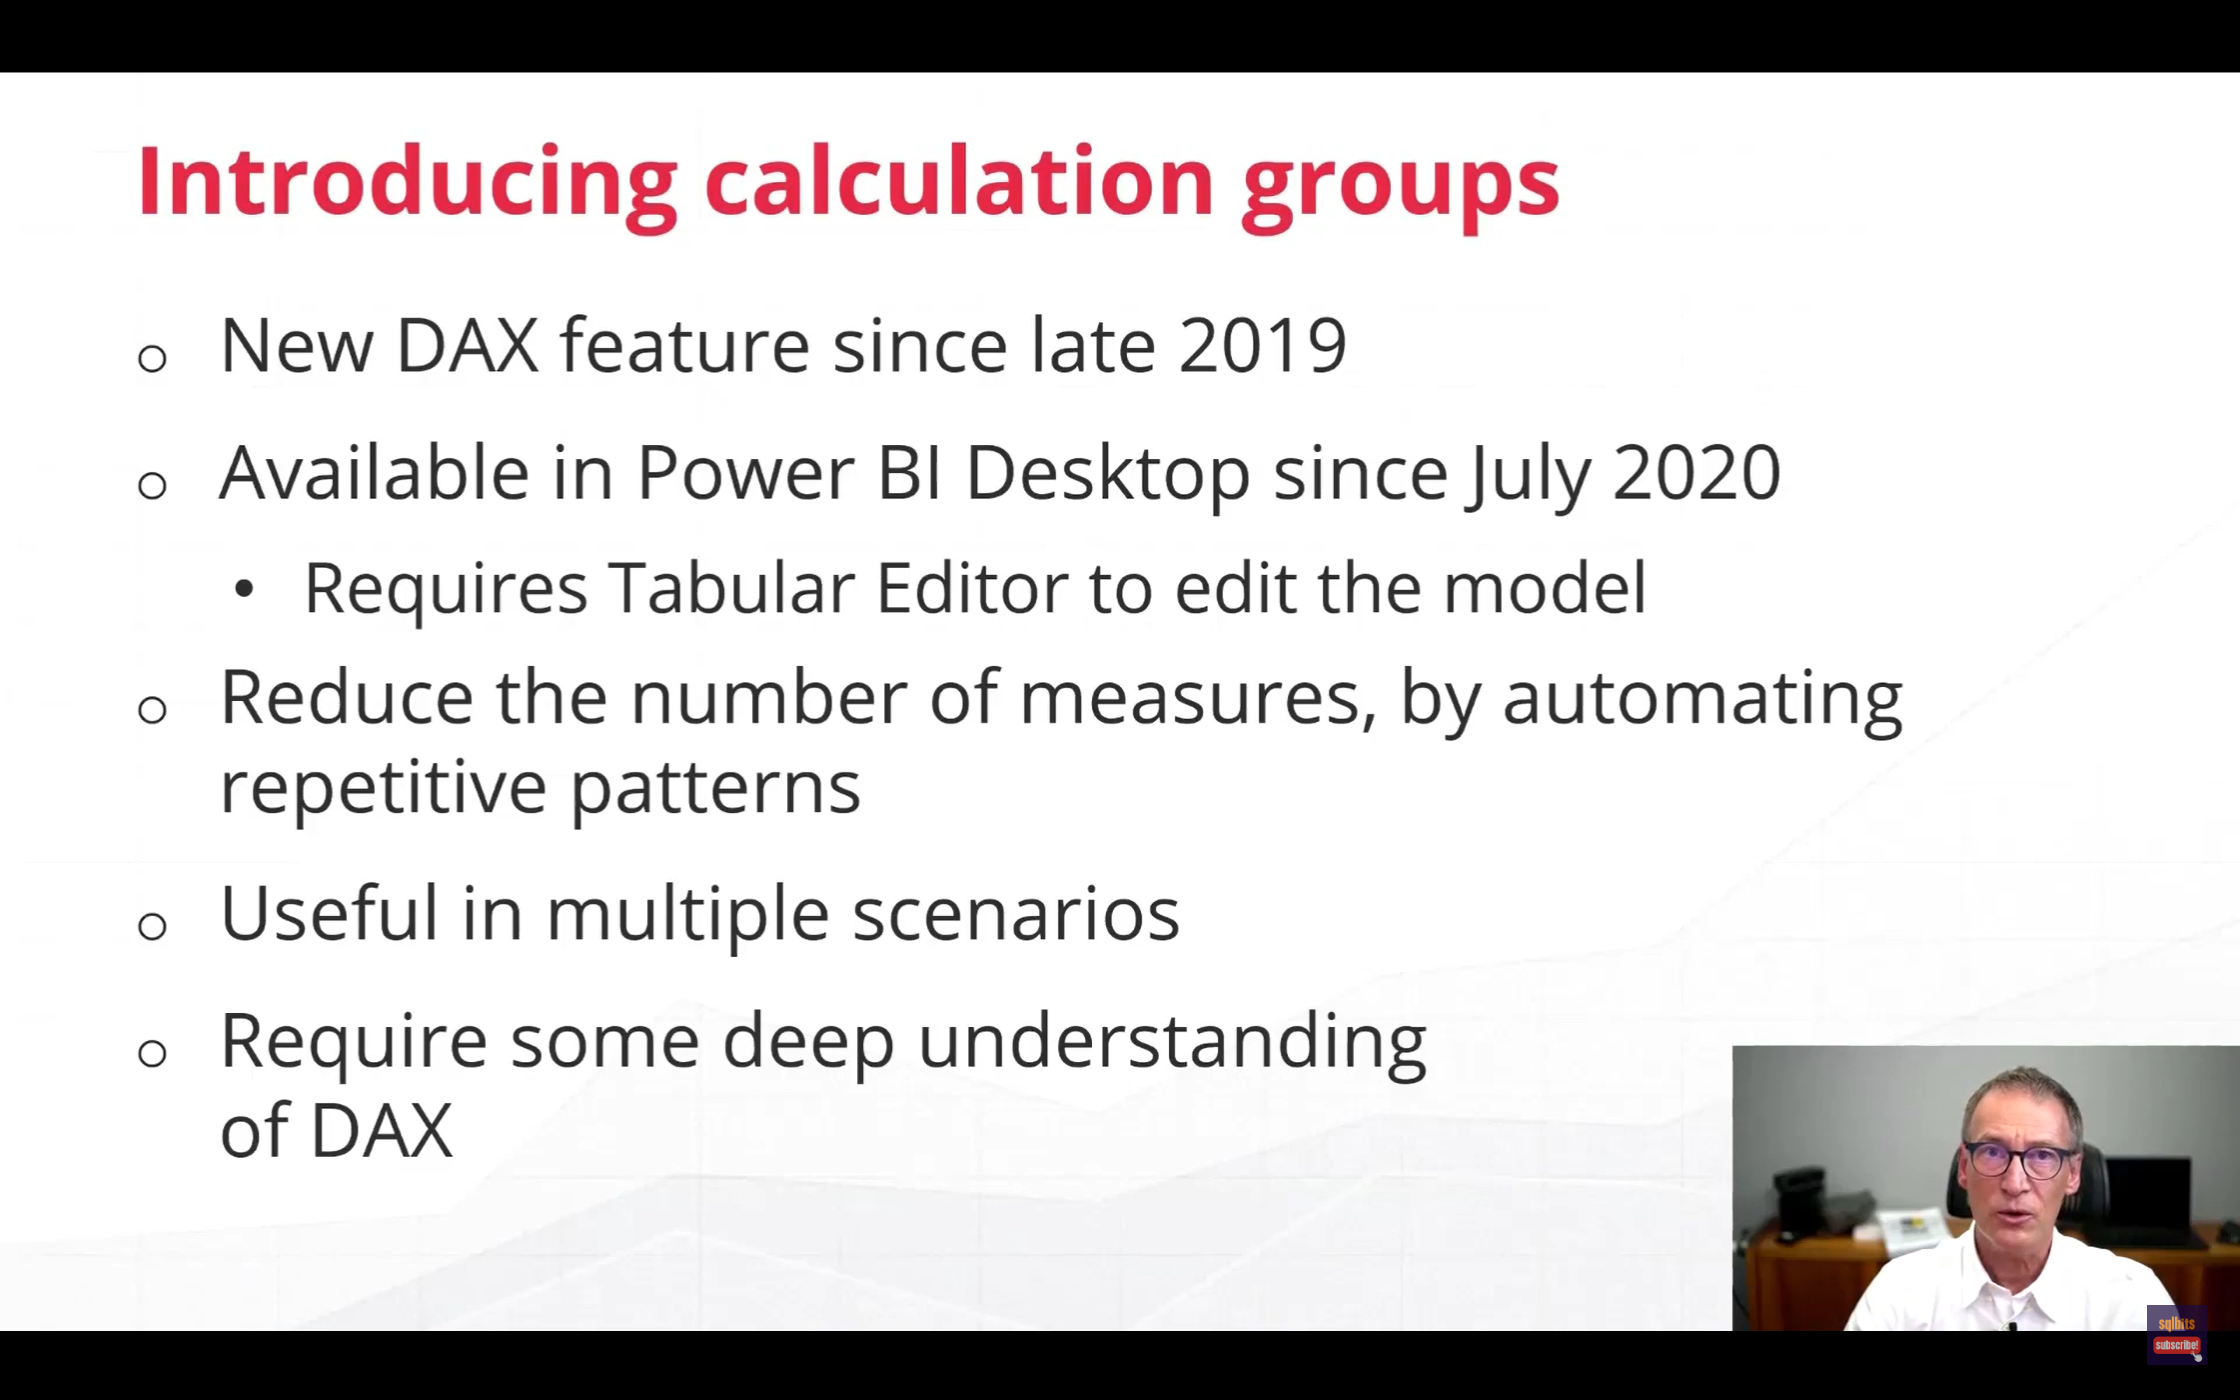

## Application

> Used to create variations of one measure all at once

Example: Suppose we have the following 4 measures: 
1. Sales Amount
2. Cost
3. Quantity
4. Margin
and for each we want to see data my month for current year, same period last year, previous quarter, and year to date.

We would end up creating 4x4 = 16 measures, which is a lot to handle using ordinary calculations especially with larger models.

## Using DAX to Develop a Slicer that Computes Variations of a Measure

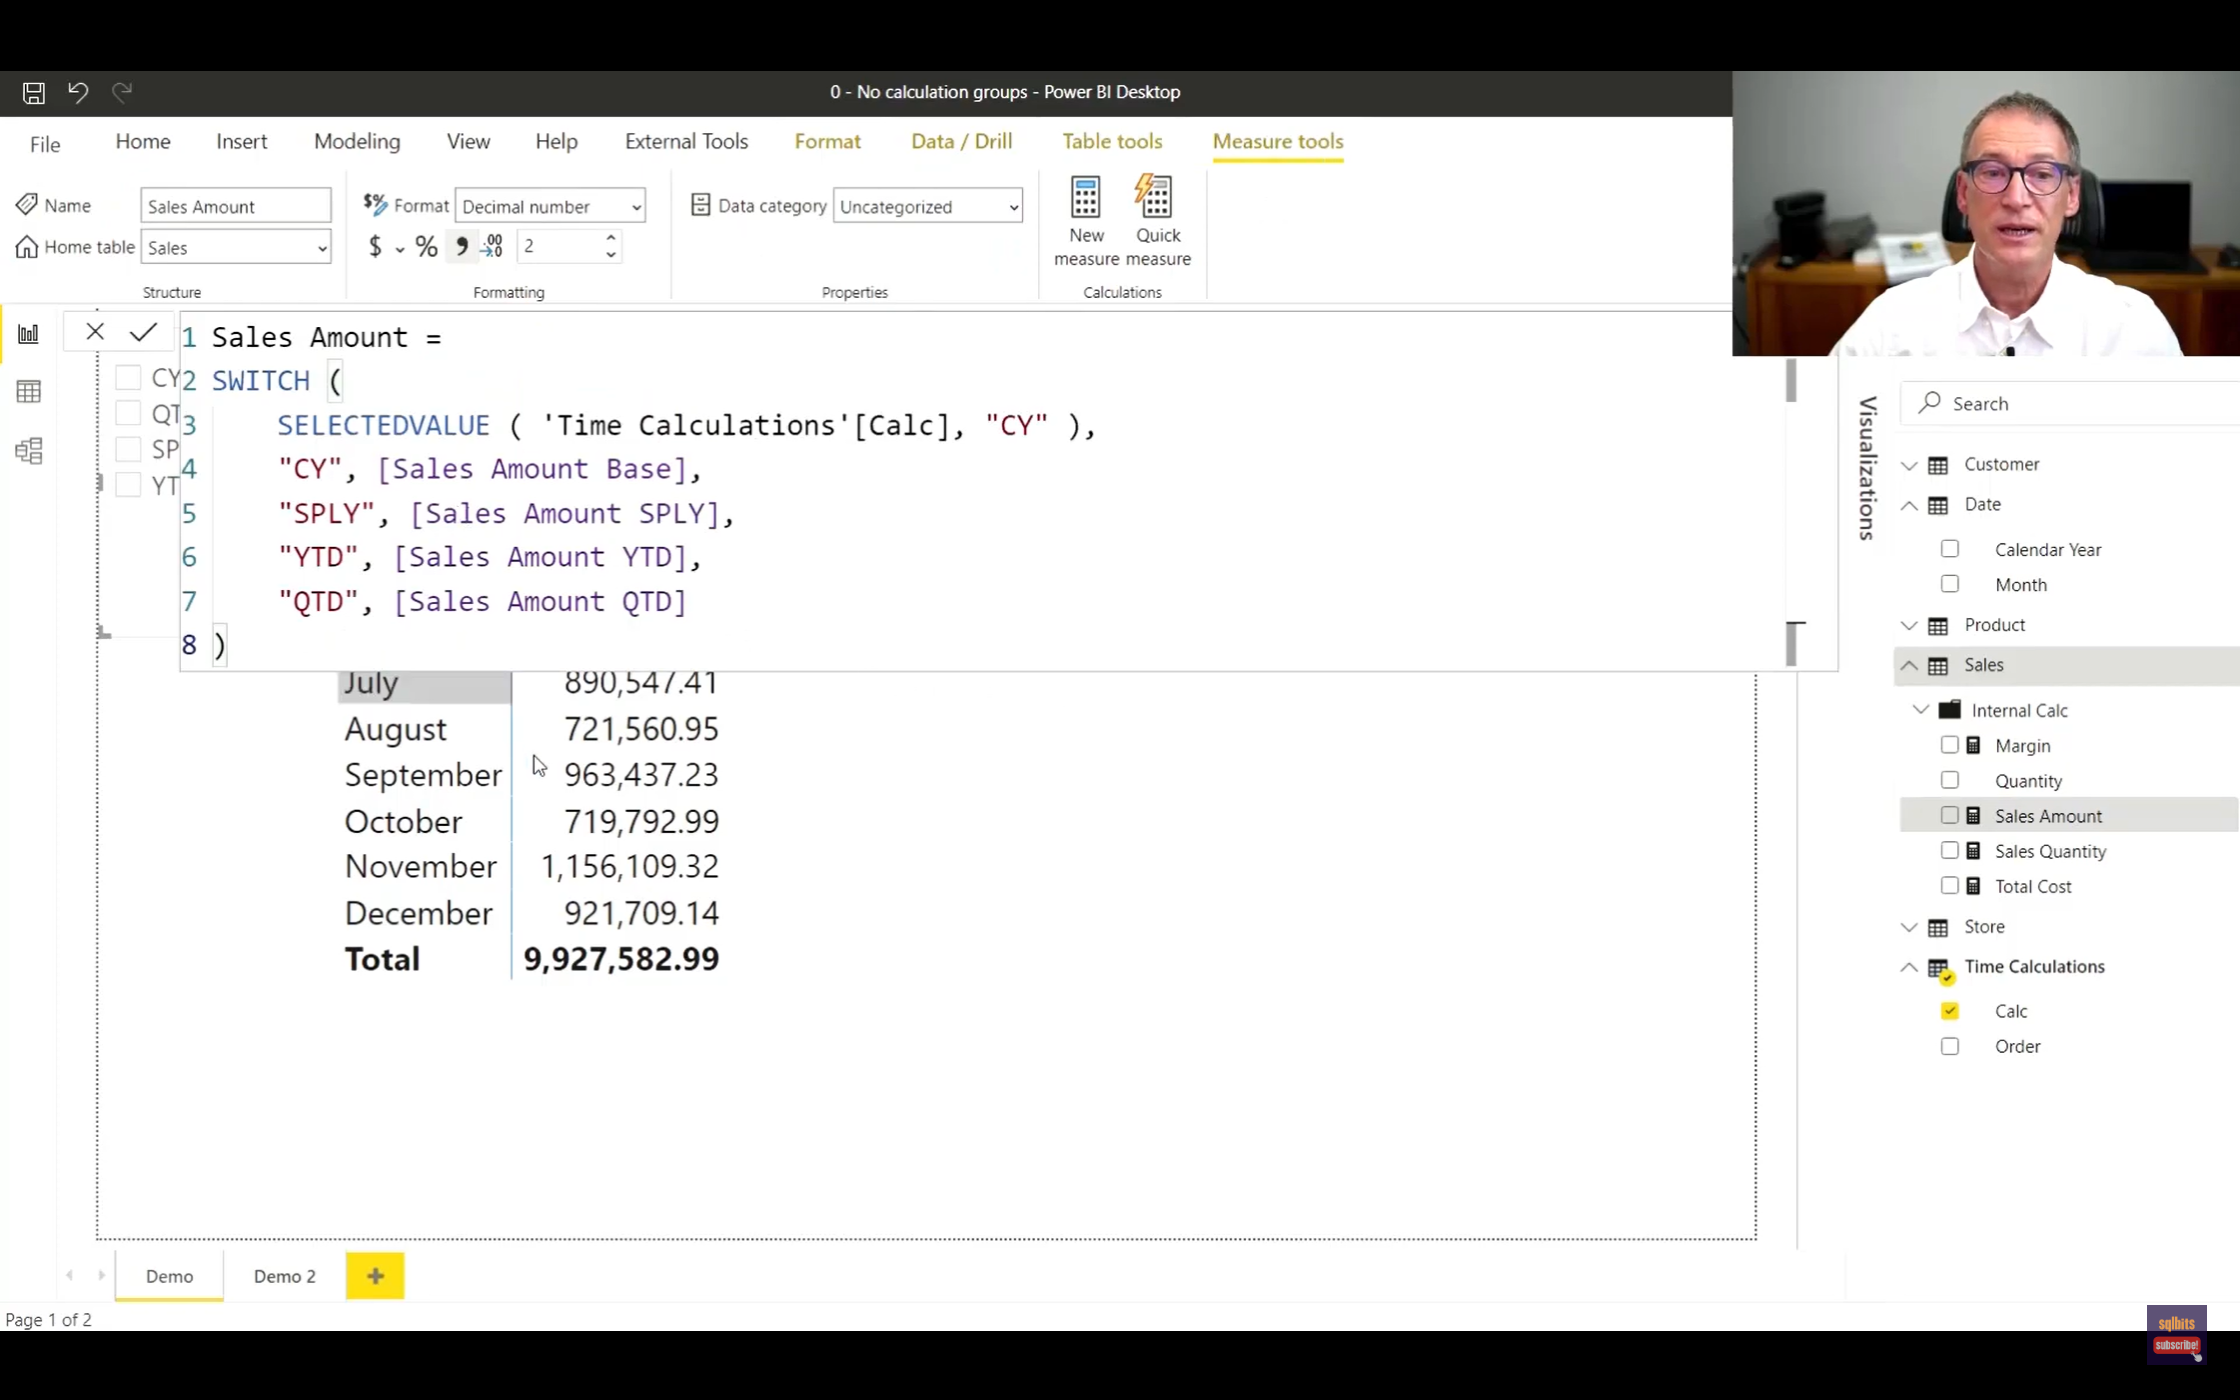

## Creating Calculation Groups using Standard DAX

__Step 1:__ 
Create the Column Filter with the name of the measures which are sales variations by time. This is an independent table created by inserting data in a blank table

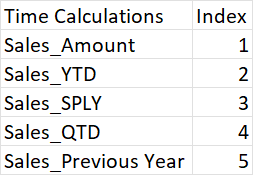

__Step 2:__ Create a measure in the sales table that captures the different time variations.

    Sales by time = 
    
    SWITCH(SELECTEDVALUE('Sales Variations'[Time Calculations],"Sales_Amount"),
            "Sales_Amount",SUM(FactOnlineSales[SalesAmount]),
            "Sales_YTD",TOTALYTD(SUM(FactOnlineSales[SalesAmount]),DATESYTD(FactOnlineSales[DateKey])),
            "Sales_SPLY",CALCULATE(SUM(FactOnlineSales[SalesAmount]),SAMEPERIODLASTYEAR(FactOnlineSales[DateKey])),
            "Sales_QTD",TOTALQTD(SUM(FactOnlineSales[SalesAmount]),DATESQTD(FactOnlineSales[DateKey])),
            "Sales_Previous Year",CALCULATE(SUM(FactOnlineSales[SalesAmount]),PREVIOUSYEAR(FactOnlineSales[DateKey])))

__Step 3:__ Create a date time using minimum and maximum sales dates as follows and form relationship between that table and FacOnlineSales:

    OnlineSales Calendar = CALENDAR(MIN(FactOnlineSales[DateKey]),MAX(FactOnlineSales[DateKey]))

__Step 4:__ Create a table as below using date column from sales table, column header as Time Calculations from the solo table, and 'Sales by time' measure. 

### Output using OnlineSales Calendar created as Calendar Table

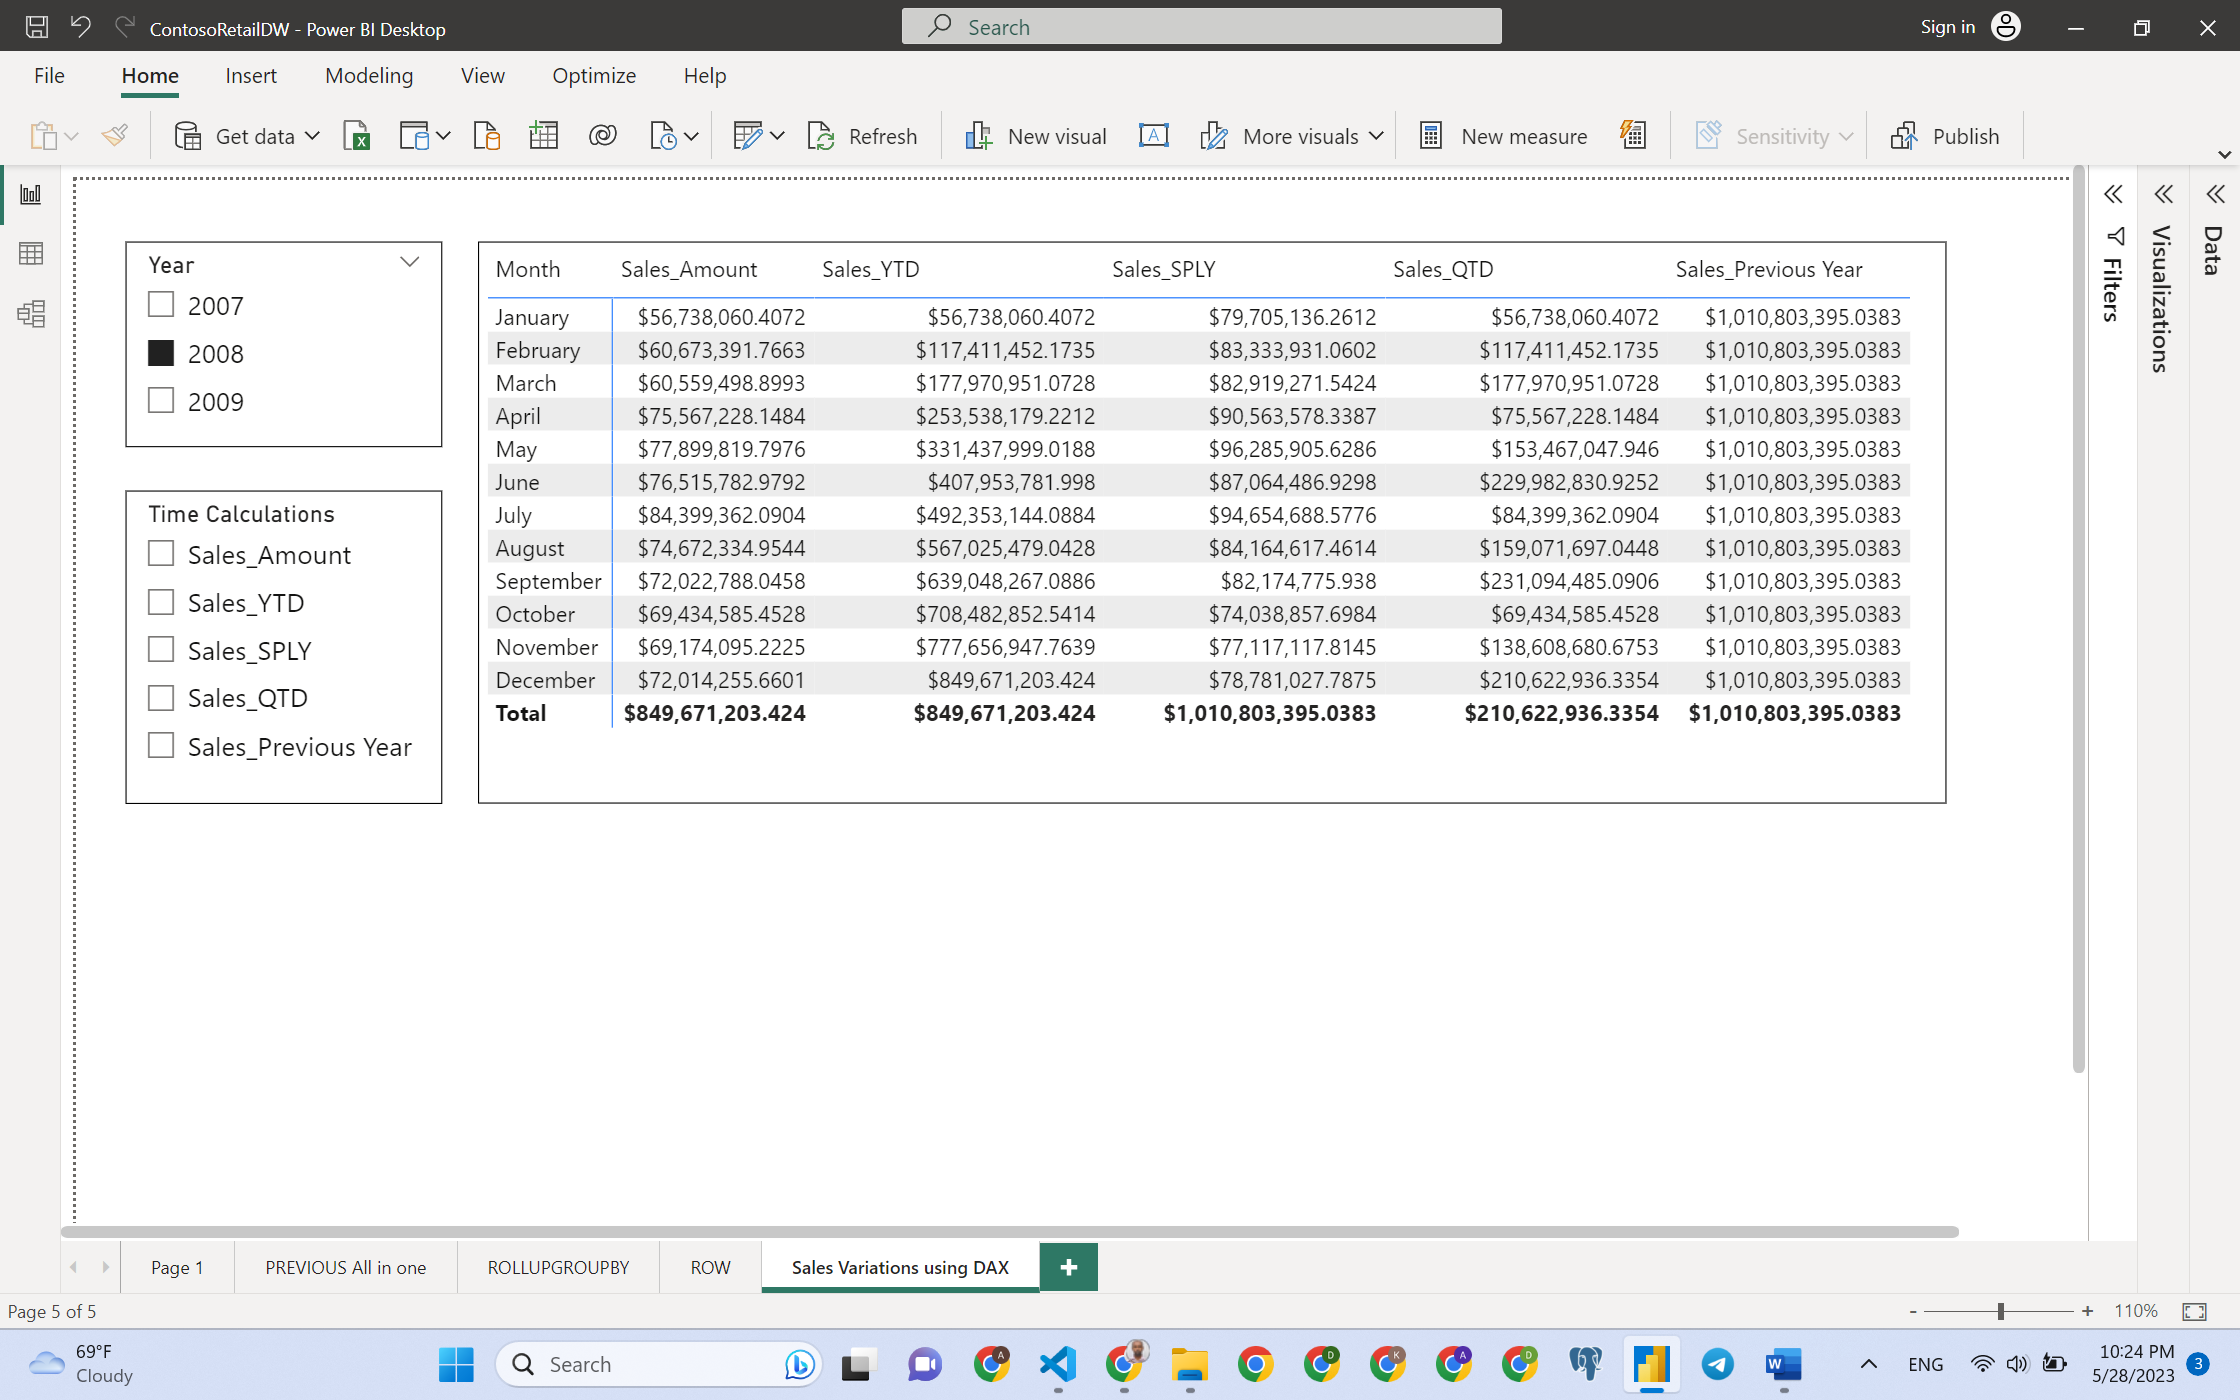

__Note:__ Filtering by year and time calculations using DateKey from FactOnlineSales table will give an output but filtering will not be correct except when Day is used as row filter or first column. __*See table below*__

### Output using DateKey from FactOnlineSales Table

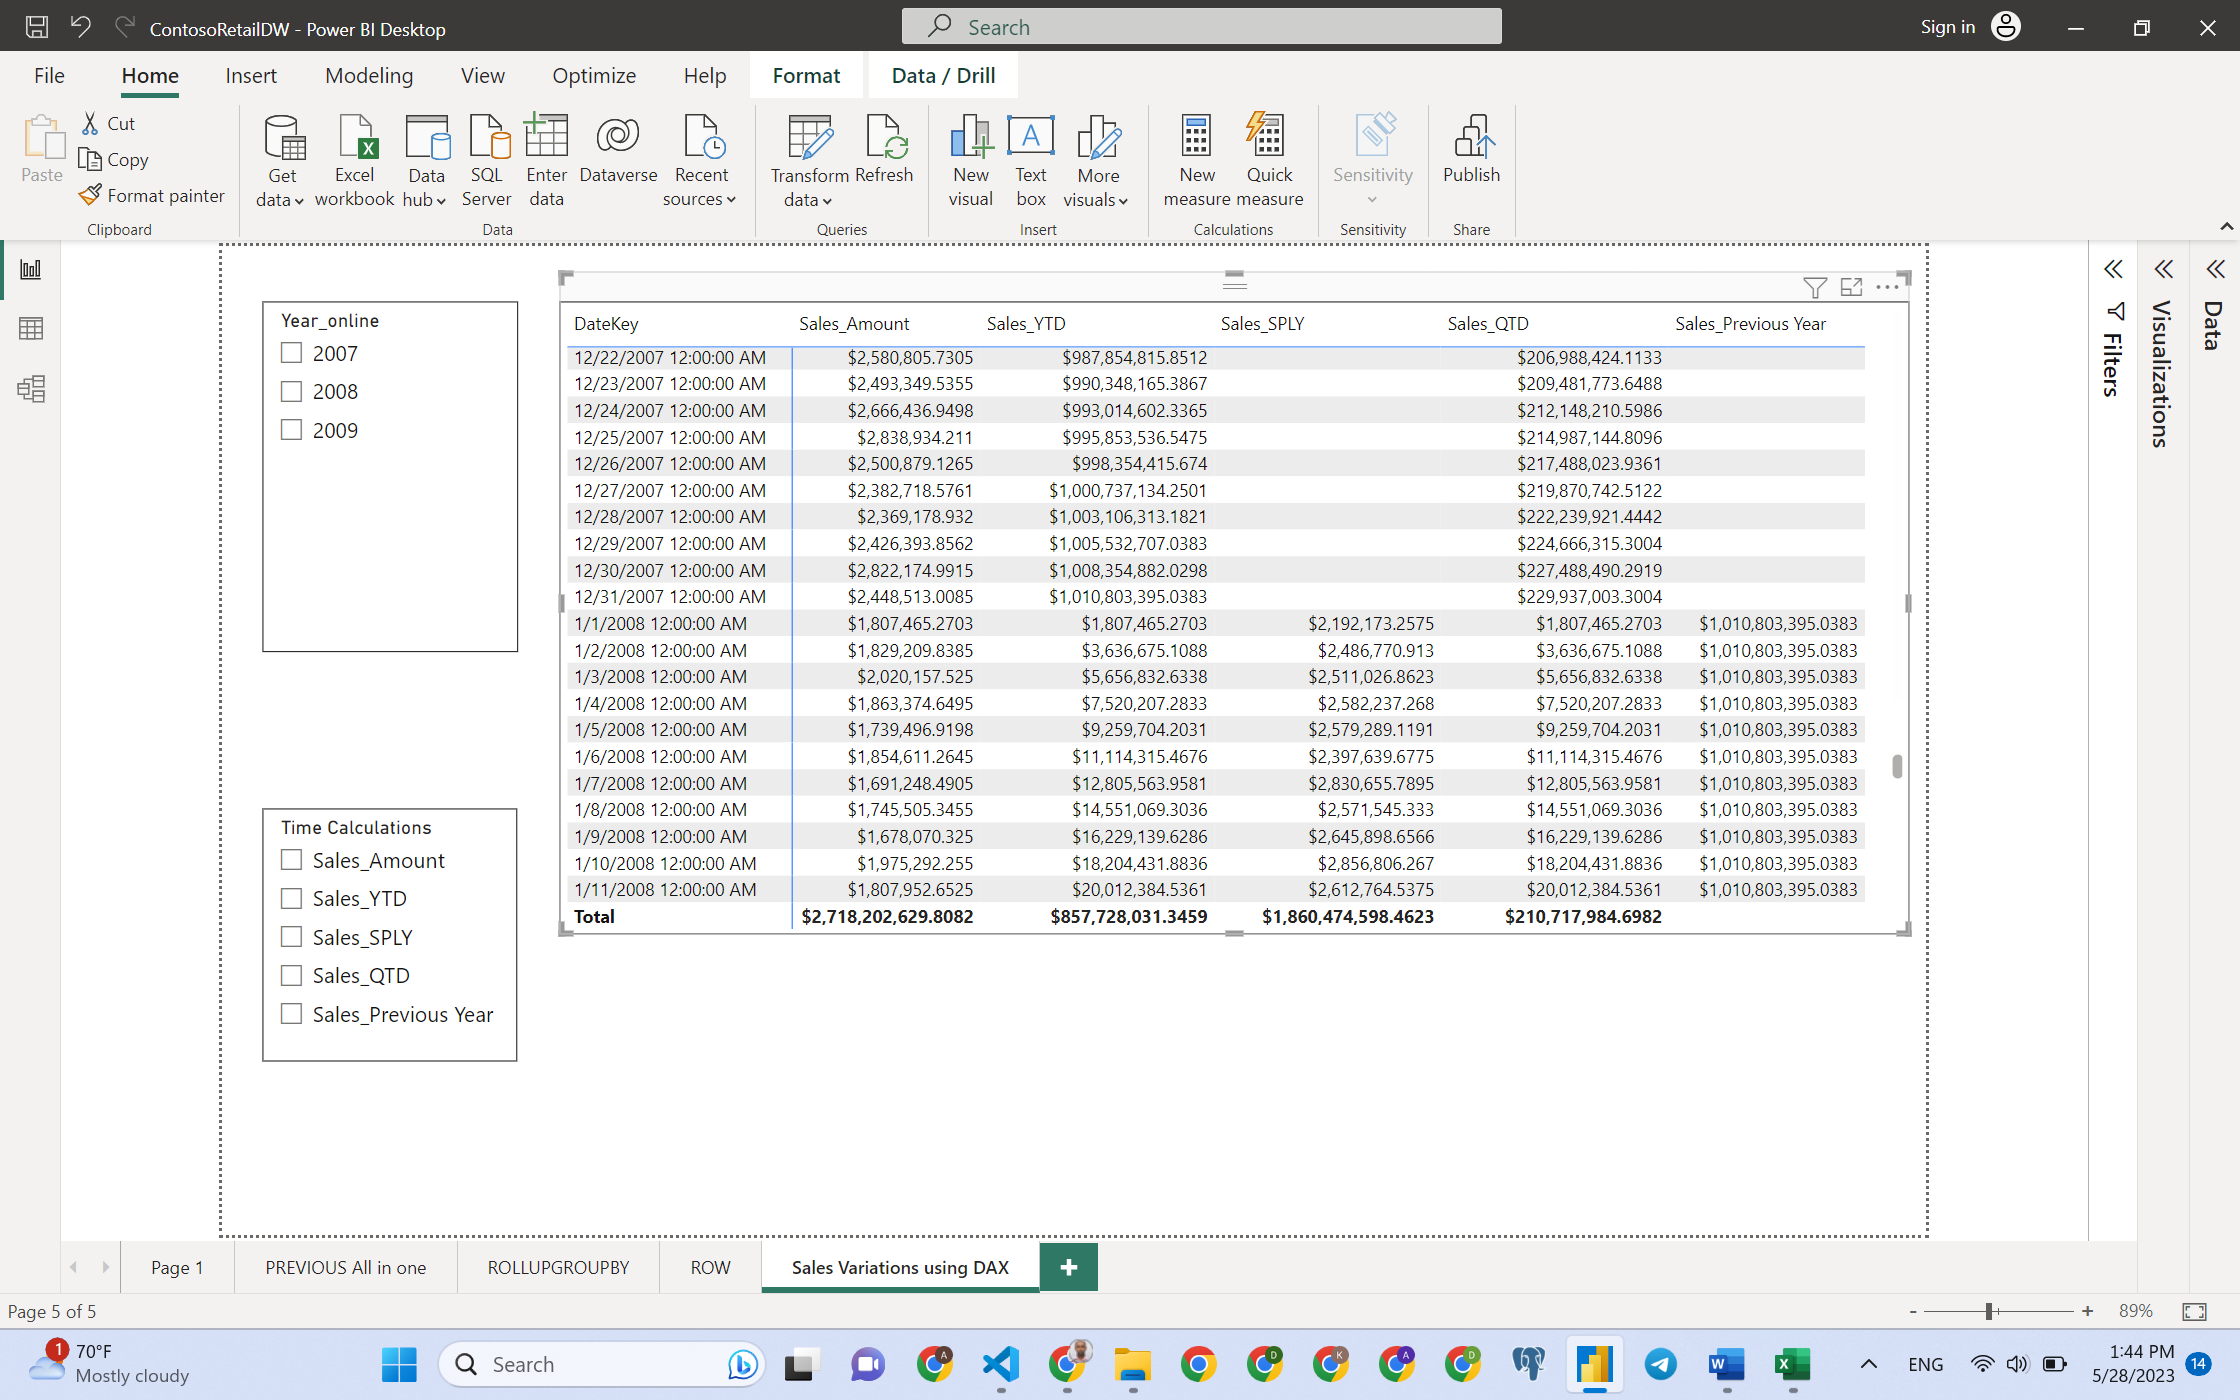

Note the large measure calculation needed even for a single time variation for Sales. If we added more columns like quanitiy, discount, new income, the process will be a bit cumbersome and hence the need to use Calculation Groups using Tabular Editor

## Calculation Groups using Tabular Editor

      "calculationGroup": {
        "calculationItems": [
          {
            "name": "CY",
            "expression": "SELECTEDMEASURE()"
          },
          {
            "name": "SPLY",
            "expression": "CALCULATE(SELECTEDMEASURE(),SAMEPERIODLASTYEAR('OnlineSales Calendar'[Date]))"
          },
          {
            "name": "YTD",
            "expression": "CALCULATE(SELECTEDMEASURE(),DATESYTD('OnlineSales Calendar'[Date]))"
          },
          {
            "name": "QTD",
            "expression": "CALCULATE(SELECTEDMEASURE(),DATESQTD('OnlineSales Calendar'[Date]))"
          },
          {
            "name": "PY",
            "expression": "CALCULATE(SELECTEDMEASURE(),PREVIOUSYEAR('OnlineSales Calendar'[Date]))"
          }
        ]
      }